In [17]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
# Load the dataset
file_path = 'Bank_Churn.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

In [3]:
# Display first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Basic info about the dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.49979

In [6]:
# Checking for missing values
print("\nChecking for Missing Values:")
print(data.isnull().sum())


Checking for Missing Values:
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Exploratory Data Analysis (EDA)

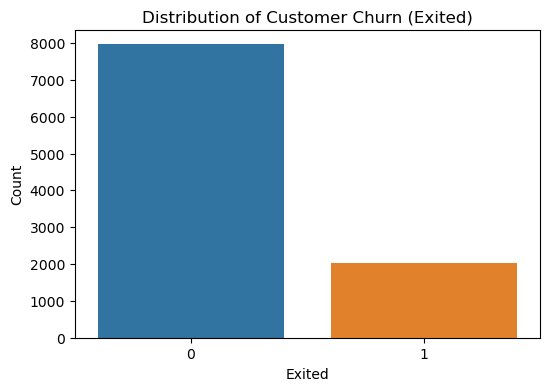

In [7]:
# Checking the distribution of the target variable (Exited)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Exited')
plt.title("Distribution of Customer Churn (Exited)")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

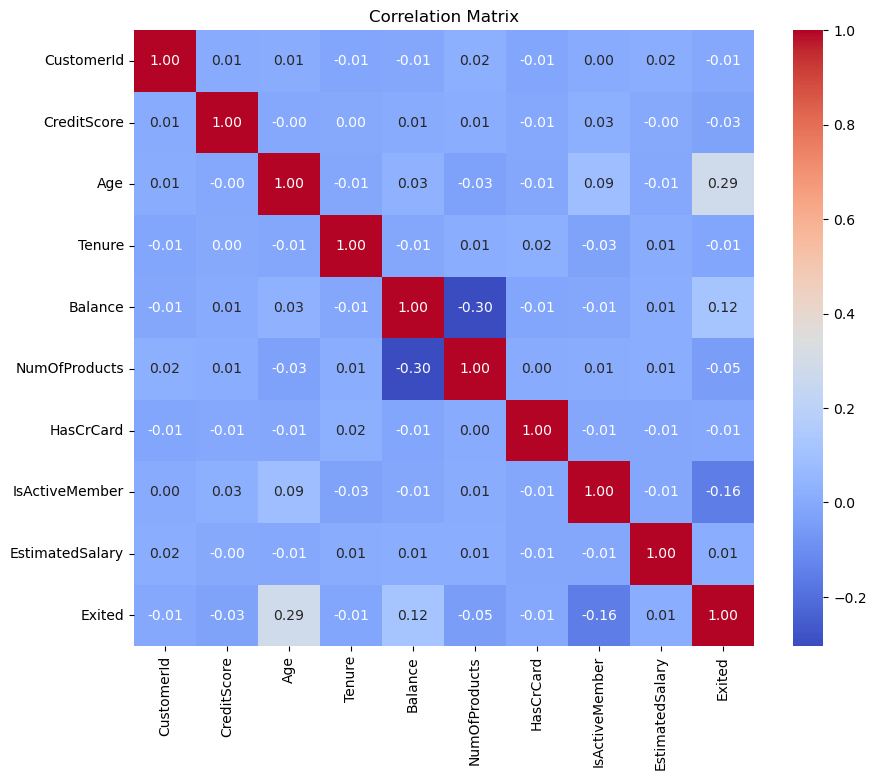

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

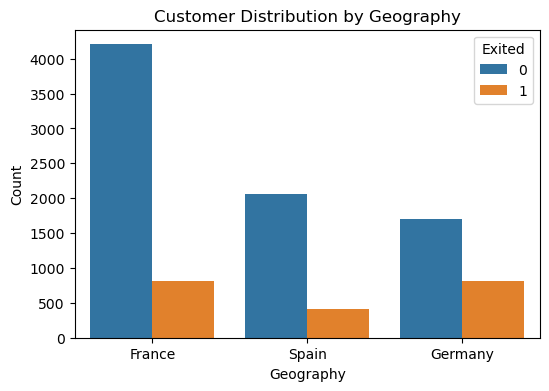

In [9]:
# Distribution of customers by Geography
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Geography', hue='Exited')
plt.title("Customer Distribution by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()


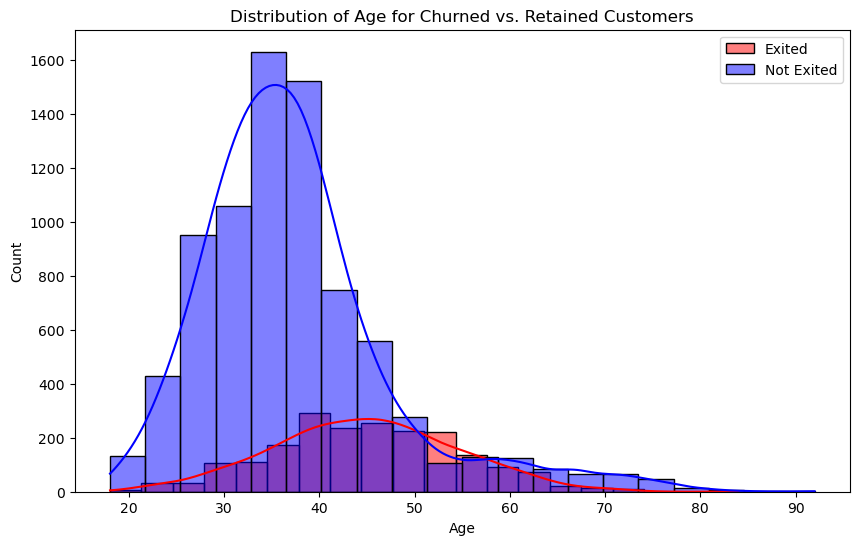

In [10]:
# Analyzing the impact of Age on churn
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Exited'] == 1]['Age'], bins=20, kde=True, color='red', label='Exited')
sns.histplot(data[data['Exited'] == 0]['Age'], bins=20, kde=True, color='blue', label='Not Exited')
plt.title("Distribution of Age for Churned vs. Retained Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

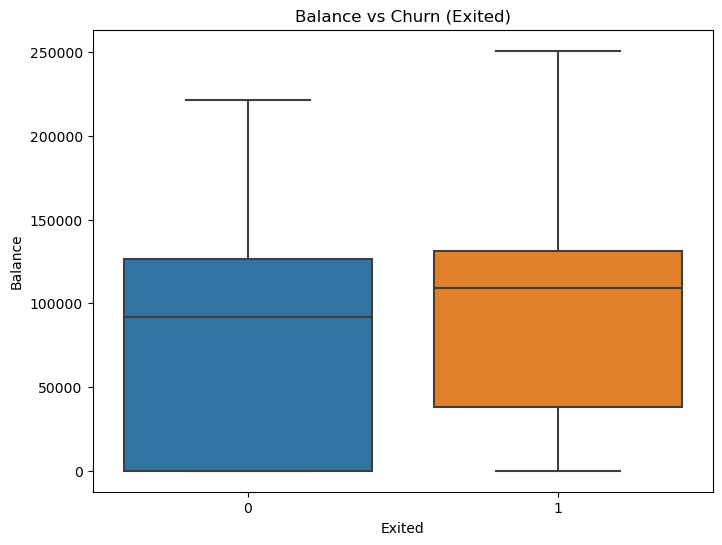

In [11]:
# Boxplot: Balance vs Exited
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Exited', y='Balance')
plt.title("Balance vs Churn (Exited)")
plt.xlabel("Exited")
plt.ylabel("Balance")
plt.show()

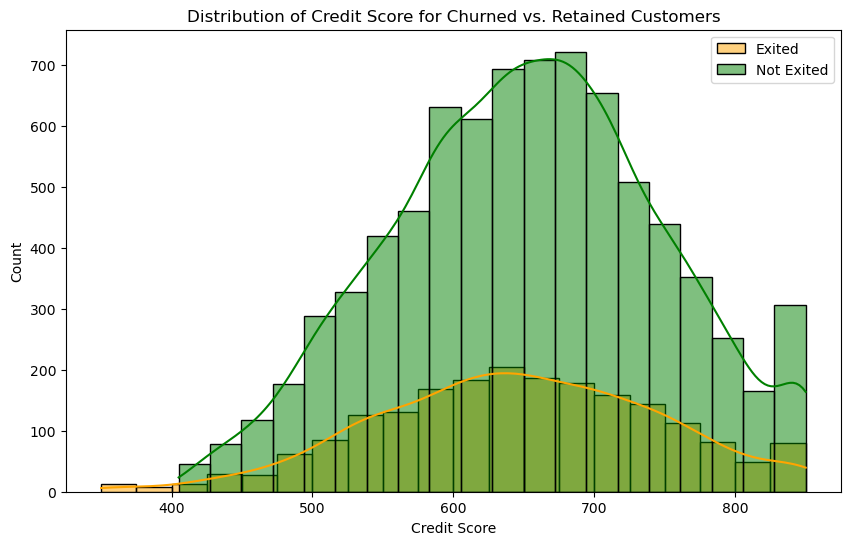

In [12]:
# Investigating the impact of CreditScore on churn
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Exited'] == 1]['CreditScore'], bins=20, kde=True, color='orange', label='Exited')
sns.histplot(data[data['Exited'] == 0]['CreditScore'], bins=20, kde=True, color='green', label='Not Exited')
plt.title("Distribution of Credit Score for Churned vs. Retained Customers")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.legend()
plt.show()

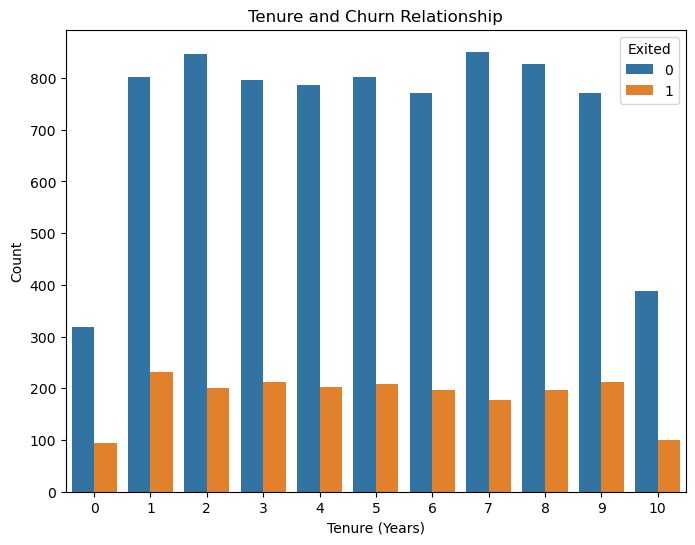

In [13]:
# Analyzing tenure and churn relationship
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Tenure', hue='Exited')
plt.title("Tenure and Churn Relationship")
plt.xlabel("Tenure (Years)")
plt.ylabel("Count")
plt.show()

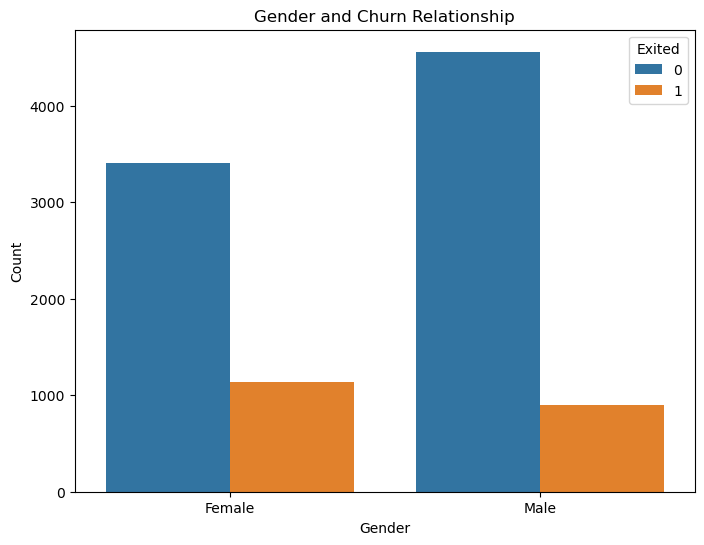

In [14]:
# Analyze categorical variables: Gender and IsActiveMember
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Exited')
plt.title("Gender and Churn Relationship")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

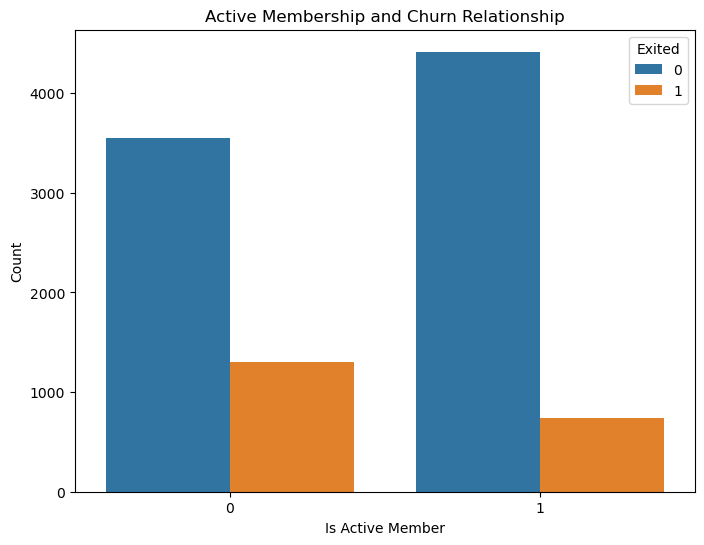

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='IsActiveMember', hue='Exited')
plt.title("Active Membership and Churn Relationship")
plt.xlabel("Is Active Member")
plt.ylabel("Count")
plt.show()

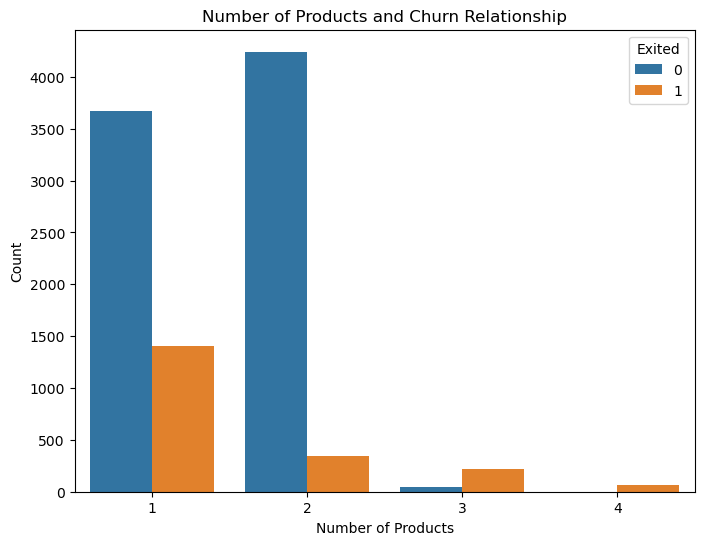

In [16]:
# Insights about NumOfProducts
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='NumOfProducts', hue='Exited')
plt.title("Number of Products and Churn Relationship")
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.show()

# Preprocessing

In [18]:
# Ecoding categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Female: 0, Male: 1
data['Geography'] = label_encoder.fit_transform(data['Geography'])  # Encodes countries

In [19]:
# Features and targe variable
X = data.drop(columns=['CustomerId', 'Surname', 'Exited'])  # Drop unnecessary columns
y = data['Exited']

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Model training: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [24]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000




Confusion Matrix:


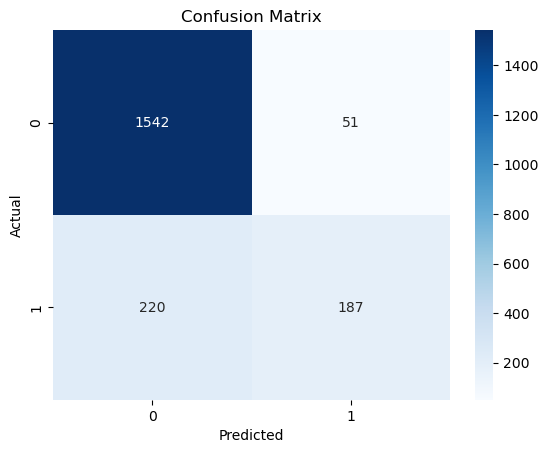

In [25]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
# Accuracy and AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nAccuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy: 0.86
ROC AUC: 0.85


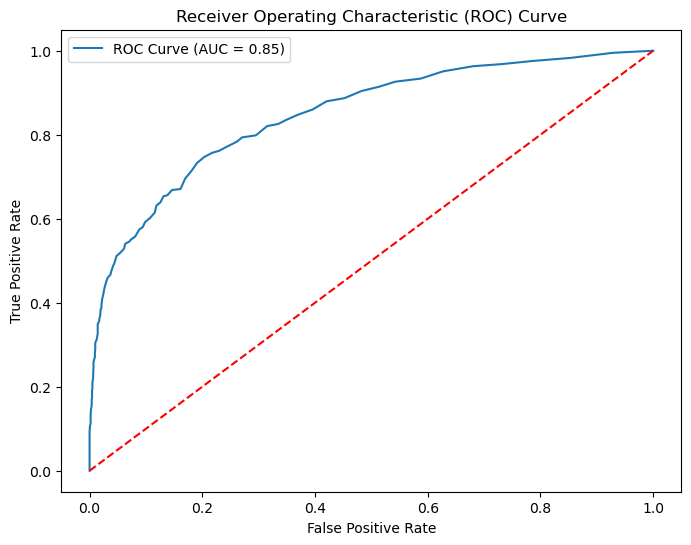

In [27]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Random guess line
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [28]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

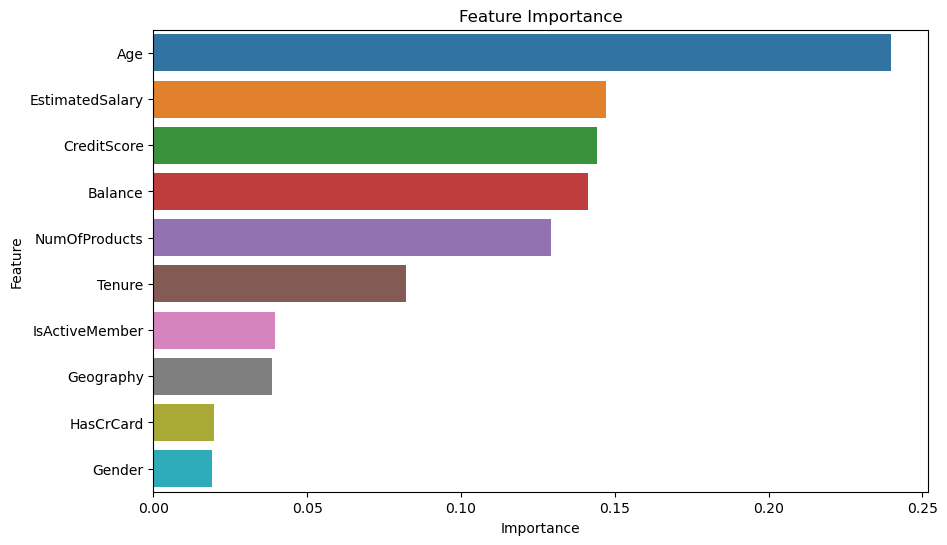

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()